In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,classification_report,confusion_matrix, recall_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from statistics import mean
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import plot_tree

pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("C:/Users/Vivek Goli/DataSciencePractice/Datasets/modified_data.csv")
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,mental_state,stress_state,anxiety_state,depression_state
0,3,28,3890,3,25,2122,1,16,1944,3,8,2044,3,34,2153,3,33,2416,3,10,2818,3,13,2259,1,21,5541,0,38,4441,3,31,2451,3,24,3325,3,14,1416,3,37,5021,3,27,2342,3,39,2480,2,6,2476,3,35,1627,2,17,9050,2,30,7001,0,11,4719,3,20,2984,3,36,1313,3,42,2444,3,1,9880,3,2,4695,3,5,1677,2,4,6723,3,3,5953,1,26,8062,3,12,5560,3,7,3032,1,29,3316,2,40,3563,3,23,5594,3,41,1477,0,18,3885,1,9,5265,3,19,1892,2,22,4228,3,32,1574,3,15,2969,IN,2,19,167,166,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,1,12,1,10,2,1,2,NaN,4,4,4,3
1,3,2,8118,0,36,2890,1,35,4777,2,28,3090,3,10,5078,3,40,2790,2,18,3408,3,1,8342,2,37,916,1,32,1537,1,21,3926,1,25,3691,3,26,2004,3,4,8888,2,27,4109,2,19,4058,3,12,3692,1,6,3373,0,23,6015,0,16,3023,1,22,2670,2,3,5727,0,39,3641,1,33,2670,1,7,7649,2,11,2537,2,5,2907,3,9,1685,2,41,4726,2,17,6063,1,20,3307,2,14,4995,2,38,2505,1,34,2540,1,31,4359,2,15,3925,3,13,4609,1,30,3755,1,42,2323,0,24,5713,1,8,1334,1,29,5562,US,2,1,193,186,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,1,2,7,0,70,2,1,4,NaN,2,3,2,3
2,2,7,5784,0,33,4373,3,41,3242,0,13,6470,3,11,3927,2,9,3704,0,17,4550,2,5,3021,1,32,5864,3,21,3722,1,10,3424,0,36,3236,3,23,2489,0,34,7290,3,12,6587,3,22,3627,3,38,2905,1,18,2998,1,8,10233,0,16,4258,3,28,2888,2,4,59592,1,3,11732,3,2,8834,1,29,7358,0,30,4928,1,15,3036,0,19,4127,1,37,3934,1,26,10782,3,1,8273,2,39,3501,0,27,3824,3,25,2141,2,6,17461,3,24,1557,3,40,4446,3,42,1883,1,35,5790,1,14,4432,0,20,2203,3,31,5768,PL,2,5,271,122,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,1,4,3,60,1,1,3,NaN,2,1,1,4
3,1,23,5081,2,11,6837,1,37,5521,0,27,4556,2,28,3269,2,26,3231,3,2,7138,1,19,3079,2,31,9650,2,17,4179,1,5,5928,0,21,2838,0,20,2560,3,29,5139,1,22,3597,1,35,3336,2,10,4506,0,14,2695,0,25,8128,1,15,3125,0,6,4061,0,40,4272,0,12,4029,0,9,5630,0,18,30631,1,24,9870,3,4,2411,0,16,9478,2,1,7618,2,32,12639,2,34,5378,0,41,8923,1,38,2977,3,3,5620,0,7,16760,0,8,6427,1,39,3760,0,13,4112,2,42,2769,3,33,4432,3,30,3643,1,36,3698,US,2,3,261,336,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,1,2,4,5,70,2,1,5,biology,0,1,2,2
4,1,36,3215,1,13,7731,2,5,4156,3,10,2802,3,2,5628,1,9,6522,3,34,2374,3,11,3054,3,7,2975,2,14,3524,1,33,3033,3,23,2132,3,17,1314,3,16,3181,3,26,2249,2,19,2623,3,35,3093,3,38,7098,3,37,1938,3,15,3502,2,32,4776,2,18,4463,3,4,2436,1,40,4047,3,31,3787,3,42,2102,1,1,12351,3,3,2410,1,22,5056,3,39,3343,2,27,3012,3,20,3520,3,8,1868,3,25,2536,2,24,3725,3,30,2130,2,29,3952,2,21,10694,2,41,3231,3,12,3604,3,28,1950,2,6,6265,MY,2,1766,164,157,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,2,3,10,1,10,2,1,4,Psychology,4,3,4,4


In [3]:
print('dataset-shape  : ', df.shape)

dataset-shape  :  (39775, 176)


In [4]:
df.drop_duplicates(inplace= True)
df.shape

(39775, 176)

In [5]:
# build list of removable features to deleted from dataset
# Data cleaning
removables = [f'Q{i}E' for i in range(1, 43)] # add feature 'Q1E' to 'Q42E' to be removed
removables.extend([f'Q{i}I' for i in range(1, 43)]) # add feature 'Q1E' to 'Q42E' to be removed
removables.extend([f'VCL{i}' for i in range(1, 17)]) # add feature 'VCL1' to 'VCL16' to be removed
removables.extend([ 'source', 'introelapse', 'testelapse', 'surveyelapse', 'engnat', 'hand', 'orientation','voted', 'country', 'screensize', 'uniquenetworklocation', 'major', 'engnat', 'religion', 'race', 'voted'])

# remove features from the dataset
data = df.drop(removables, axis=1)
data.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,married,familysize,mental_state,stress_state,anxiety_state,depression_state
0,3,3,1,3,3,3,3,3,1,0,3,3,3,3,3,3,2,3,2,2,0,3,3,3,3,3,3,2,3,1,3,3,1,2,3,3,0,1,3,2,3,3,1,5,7,7,7,7,7,5,1,1,2,3,2,16,1,2,4,4,4,3
1,3,0,1,2,3,3,2,3,2,1,1,1,3,3,2,2,3,1,0,0,1,2,0,1,1,2,2,3,2,2,1,2,2,1,1,2,3,1,1,0,1,1,6,5,4,7,5,4,7,7,1,5,2,3,2,16,1,4,2,3,2,3
2,2,0,3,0,3,2,0,2,1,3,1,0,3,0,3,3,3,1,1,0,3,2,1,3,1,0,1,0,1,1,3,2,0,3,2,3,3,3,1,1,0,3,2,5,2,2,5,6,5,5,3,2,2,3,2,17,1,3,2,1,1,4
3,1,2,1,0,2,2,3,1,2,2,1,0,0,3,1,1,2,0,0,1,0,0,0,0,0,1,3,0,2,2,2,0,1,3,0,0,1,0,2,3,3,1,1,1,7,4,6,4,6,1,6,1,1,3,2,13,1,5,0,1,2,2
4,1,1,2,3,3,1,3,3,3,2,1,3,3,3,3,2,3,3,3,3,2,2,3,1,3,3,1,3,1,3,2,3,3,3,2,3,2,2,2,3,3,2,2,5,3,6,5,5,5,6,3,3,3,2,2,19,1,4,4,3,4,4


In [6]:
print('checking for null values')
data.isnull().sum()

checking for null values


Q1A                 0
Q2A                 0
Q3A                 0
Q4A                 0
Q5A                 0
                   ..
familysize          0
mental_state        0
stress_state        0
anxiety_state       0
depression_state    0
Length: 62, dtype: int64

In [7]:
data.to_csv('C:/Users/Vivek Goli/DataSciencePractice/MentalHealthProject/cleaned_data.csv', index = False)

In [8]:
#DASS question numbers regarding to each type
stress = [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]
depression = [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42] 
anxiety = [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41]

stress_ques = [f'Q{i}A' for i in stress]
stress_ques.extend(data.columns[42:58])
stress_ques.append('stress_state')
#creating a seperate data frame for stress related data
stress_df = data[stress_ques]
print('stress data : \n', stress_df.head())

depression_ques = [f'Q{i}A' for i in depression]
depression_ques.extend(data.columns[42:58])
depression_ques.append('depression_state')
#creating a seperate data frame for depression related data
depression_df = data[depression_ques]
print('\ndepression data : \n', depression_df.head())

anxiety_ques = [f'Q{i}A' for i in anxiety]
anxiety_ques.extend(data.columns[42:58])
anxiety_ques.append('anxiety_state')
#creating a seperate data frame for anxiety related data
anxiety_df = data[anxiety_ques]
print('\nanxiety data : \n', anxiety_df.head())

stress data : 
    Q1A  Q6A  Q8A  Q11A  Q12A  Q14A  Q18A  Q22A  Q27A  Q29A  Q32A  Q33A  Q35A  \
0    3    3    3     3     3     3     3     3     3     3     3     1     3   
1    3    3    3     1     1     3     1     2     2     2     2     2     1   
2    2    2    2     1     0     0     1     2     1     1     2     0     2   
3    1    2    1     1     0     3     0     0     3     2     0     1     0   
4    1    1    3     1     3     3     3     2     1     1     3     3     2   

   Q39A  TIPI1  TIPI2  TIPI3  TIPI4  TIPI5  TIPI6  TIPI7  TIPI8  TIPI9  \
0     3      1      5      7      7      7      7      7      5      1   
1     1      6      5      4      7      5      4      7      7      1   
2     1      2      5      2      2      5      6      5      5      3   
3     2      1      1      7      4      6      4      6      1      6   
4     2      2      5      3      6      5      5      5      6      3   

   TIPI10  education  urban  gender  age  married  familys

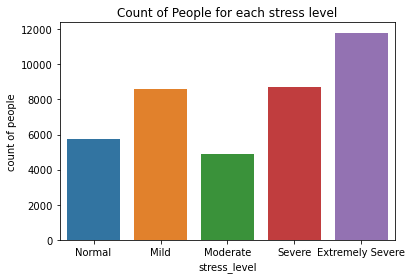

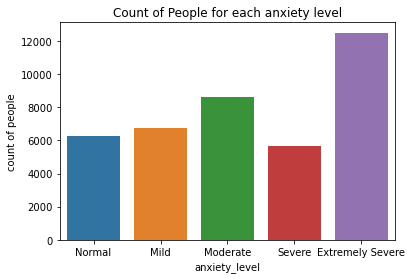

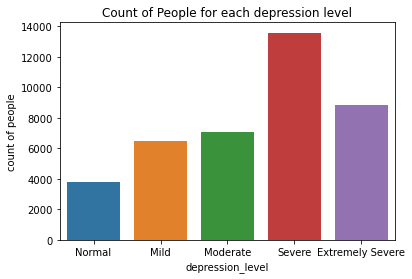

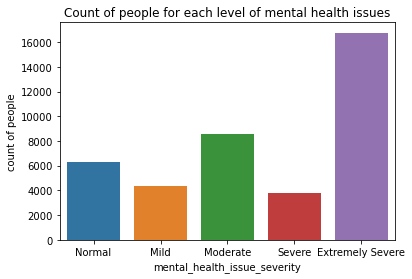

In [9]:
ind = np.arange(5)
labels = ['Normal', 'Mild', 'Moderate', 'Severe', 'Extremely Severe']

#plotting count plots for each level of severity for each issue
plt.figure()
sns.barplot(x = stress_df['stress_state'].unique(), y = stress_df['stress_state'].value_counts())
plt.title('Count of People for each stress level')
plt.xticks(ind, labels)
plt.xlabel('stress_level')
plt.ylabel('count of people')
plt.show()

plt.figure()
sns.barplot(x = anxiety_df['anxiety_state'].unique(), y = anxiety_df['anxiety_state'].value_counts())
plt.title('Count of People for each anxiety level')
plt.xticks(ind, labels)
plt.xlabel('anxiety_level')
plt.ylabel('count of people')
plt.show()

plt.figure()
sns.barplot(x = depression_df['depression_state'].unique(), y = depression_df['depression_state'].value_counts())
plt.title('Count of People for each depression level')
plt.xticks(ind, labels)
plt.xlabel('depression_level')
plt.ylabel('count of people')
plt.show()

plt.figure()
sns.barplot(x = data['mental_state'].unique(), y = data['mental_state'].value_counts())
plt.title('Count of people for each level of mental health issues')
plt.xticks(ind, labels)
plt.xlabel('mental_health_issue_severity')
plt.ylabel('count of people')
plt.show()

In [10]:
stress_df.to_csv('C:/Users/Vivek Goli/DataSciencePractice/MentalHealthProject/stress_data.csv', index = False)
depression_df.to_csv('C:/Users/Vivek Goli/DataSciencePractice/MentalHealthProject/depression_data.csv', index = False)
anxiety_df.to_csv('C:/Users/Vivek Goli/DataSciencePractice/MentalHealthProject/anxiety_data.csv', index = False)
# creating seperate files for the 3 issues

In [22]:
def visualization(y_test, pred):    # this method is used to print the evaluation measures of the models
    cf = confusion_matrix(y_test, pred)
    print(f'Confusion matrix :')
    print(cf)
    print(f"Accuracy : {accuracy_score(y_test, pred)}") # ratio of the number of correctly classified cases to the total of cases
    print(f"Presision : {precision_score(y_test, pred, average = 'weighted')}") # ability of the classifier not to label as negative a sample that is positive
    print(f"Sensitivity : {recall_score(y_test, pred, average = 'weighted')}") # ability of the classifier to capture all the positive cases
    print(f"Recall / Specificity : {recall_score(y_test, pred, average = 'weighted')}") # ability of the classifier to capture all the negative cases
    print(f"f1 score : {f1_score(y_test, pred, average = 'weighted')}") # F1-score is the weighted average of recall and precision of the respective class

def data_reduction(data):
    pca = PCA(n_components = 1)
    
    if len(data.columns) == 59: # works for all attributes
        component1 = pca.fit_transform(data.iloc[:, 0:42])  #DASS questions attributes
        component2 = pca.fit_transform(data.iloc[:, 42:52]) #personality attributes

        q_df = pd.DataFrame(data = component1, columns = ['Questions_score']) # scores of 42 question attributes into one
        p_df = pd.DataFrame(data = component2, columns = ['Personality_score']) # scores of 10 personlaity attributes into one

        data = pd.concat([q_df, p_df, data.iloc[:, 52:]], axis = 1) 
        
    elif len(data.columns) == 31: # works for attributes of depression, anxiety, stress seperately
        component1 = pca.fit_transform(data.iloc[:, 0:14])  #DASS questions attributes
        component2 = pca.fit_transform(data.iloc[:, 14:24]) #personality attributes

        q_df = pd.DataFrame(data = component1, columns = ['Questions_score']) # scores of 14 question attributes into one
        p_df = pd.DataFrame(data = component2, columns = ['Personality_score']) # scores of 10 personlaity attributes into one

        data = pd.concat([q_df, p_df, data.iloc[:, 24:]], axis = 1)
    print(data)
    return data

def score(model, X_train, X_test, y_train, y_test): # used in cross validation step
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

def Model(name, X_train, X_test, y_train, y_test, attr):
    
    model1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 42, max_depth = 4, min_samples_leaf = 5)
    model2 = DecisionTreeClassifier(criterion = 'gini', random_state = 42, max_depth = 4, min_samples_leaf = 5)
    model3 = GaussianNB()
    model4 = KNeighborsClassifier(n_neighbors= 60, metric = 'euclidean') # k = 60
    
    print(f'\n\n{name}')
    if name == "decisionTree_entropy":
        model1.fit(X_train, y_train)
        pred = model1.predict(X_test)
        plt.figure(figsize=(25,10))    # to plot a decision tree
        a = plot_tree(model1, feature_names = attr, class_names = ['0', '1', '2', '3', '4'], filled=True, rounded=True, fontsize=8)
        plt.savefig('decisiontree_entropy.png')
        plt.show()
    
    elif name == 'decisionTree_gini':
        model2.fit(X_train, y_train)
        pred = model2.predict(X_test)
        plt.figure(figsize=(25,10))   # to plot a decision tree
        a = plot_tree(model2, feature_names = attr, class_names = ['0', '1', '2', '3', '4'], filled=True, rounded=True, fontsize=8)
        plt.savefig('decisiontree_gini.png')
        plt.show()
    
    elif name == 'naiveBayes':
        model3.fit(X_train, y_train)
        pred = model3.predict(X_test)
    
    elif name == 'kNeighbours':
        model4.fit(X_train, y_train)
        pred = model4.predict(X_test)
    visualization(y_test, pred)

In [23]:
def Classification(issue, df):
    
    print(f'classification of {issue}\n')
    new_data = data_reduction(df)

    X = new_data.loc[:, new_data.columns[:-1]] # attribute values into X
    y = new_data.loc[:, new_data.columns[-1]]  # class label values into y

    scaler = MinMaxScaler(feature_range=(0,1),copy=True,clip=False)

    X = scaler.fit_transform(X)  # scaling X 
    y = y.to_numpy()

    dic = {"decisionTree_entropy":[], "decisionTree_gini":[], "naiveBayes":[], "kNeighbours":[]}
    mean_accuracies = []

    fold = StratifiedKFold(n_splits = 4)

    for train_index, test_index in fold.split(X,y):   # k-fold cross validation
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        
        # a model is passed to the score method and it return the accuracy score of that model
        # this happens 4 times as we are spliting the data 4 times for cross validation
        dic["decisionTree_entropy"].append(score(DecisionTreeClassifier(criterion = 'entropy', random_state = 42, max_depth = 4, min_samples_leaf = 5), X_train, X_test, y_train, y_test))
        dic["decisionTree_gini"].append(score(DecisionTreeClassifier(criterion = 'gini', random_state = 42, max_depth = 4, min_samples_leaf = 5), X_train, X_test, y_train, y_test))
        dic["naiveBayes"].append(score(GaussianNB(), X_train, X_test, y_train, y_test))
        dic["kNeighbours"].append(score(KNeighborsClassifier(n_neighbors=60, metric = 'euclidean'), X_train, X_test, y_train, y_test))

    # after checking 4 different folds of the dataset average accuracy for each model is derived
    for key, value in dic.items():
        print(f'{key} accuracies : {value}')
        print(f'mean accuracy : {mean(value)}\n')
        dic[key] = mean(value)
        
    best=list(dic.keys())[list(dic.values()).index(max(dic.values()))]
    print(f"Best classification method is {best}")
    print('accuracy : ', max(dic[i] for i in dic)*100)
    print()
    
    for name in dic.keys():
        attributes = new_data.columns[:-1]
        label = new_data.columns[-1]
        x = new_data.loc[:, attributes] #values
        y = new_data.loc[:, label] #labels
    
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 1) # splits the data into testing and training data
    
        Model(name, X_train, X_test, y_train, y_test, attributes)

In [13]:
df = pd.read_csv('C:/Users/Vivek Goli/DataSciencePractice/MentalHealthProject/cleaned_data.csv')
df1 = pd.read_csv('C:/Users/Vivek Goli/DataSciencePractice/MentalHealthProject/stress_data.csv')
df2 = pd.read_csv('C:/Users/Vivek Goli/DataSciencePractice/MentalHealthProject/anxiety_data.csv')
df3 = pd.read_csv('C:/Users/Vivek Goli/DataSciencePractice/MentalHealthProject/depression_data.csv')

df = df.drop(['stress_state', 'depression_state', 'anxiety_state'], axis=1)

In [14]:
df.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,married,familysize,mental_state
0,3,3,1,3,3,3,3,3,1,0,3,3,3,3,3,3,2,3,2,2,0,3,3,3,3,3,3,2,3,1,3,3,1,2,3,3,0,1,3,2,3,3,1,5,7,7,7,7,7,5,1,1,2,3,2,16,1,2,4
1,3,0,1,2,3,3,2,3,2,1,1,1,3,3,2,2,3,1,0,0,1,2,0,1,1,2,2,3,2,2,1,2,2,1,1,2,3,1,1,0,1,1,6,5,4,7,5,4,7,7,1,5,2,3,2,16,1,4,2
2,2,0,3,0,3,2,0,2,1,3,1,0,3,0,3,3,3,1,1,0,3,2,1,3,1,0,1,0,1,1,3,2,0,3,2,3,3,3,1,1,0,3,2,5,2,2,5,6,5,5,3,2,2,3,2,17,1,3,2
3,1,2,1,0,2,2,3,1,2,2,1,0,0,3,1,1,2,0,0,1,0,0,0,0,0,1,3,0,2,2,2,0,1,3,0,0,1,0,2,3,3,1,1,1,7,4,6,4,6,1,6,1,1,3,2,13,1,5,0
4,1,1,2,3,3,1,3,3,3,2,1,3,3,3,3,2,3,3,3,3,2,2,3,1,3,3,1,3,1,3,2,3,3,3,2,3,2,2,2,3,3,2,2,5,3,6,5,5,5,6,3,3,3,2,2,19,1,4,4


In [15]:
df1.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,married,familysize,stress_state
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3,1,5,7,7,7,7,7,5,1,1,2,3,2,16,1,2,4
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1,6,5,4,7,5,4,7,7,1,5,2,3,2,16,1,4,3
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1,2,5,2,2,5,6,5,5,3,2,2,3,2,17,1,3,1
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2,1,1,7,4,6,4,6,1,6,1,1,3,2,13,1,5,1
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2,2,5,3,6,5,5,5,6,3,3,3,2,2,19,1,4,3


In [16]:
df2.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,married,familysize,anxiety_state
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,1,5,7,7,7,7,7,5,1,1,2,3,2,16,1,2,4
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,6,5,4,7,5,4,7,7,1,5,2,3,2,16,1,4,2
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,2,5,2,2,5,6,5,5,3,2,2,3,2,17,1,3,1
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,1,1,7,4,6,4,6,1,6,1,1,3,2,13,1,5,2
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,2,5,3,6,5,5,5,6,3,3,3,2,2,19,1,4,4


In [17]:
df3.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,married,familysize,depression_state
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,1,5,7,7,7,7,7,5,1,1,2,3,2,16,1,2,3
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,6,5,4,7,5,4,7,7,1,5,2,3,2,16,1,4,3
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,2,5,2,2,5,6,5,5,3,2,2,3,2,17,1,3,4
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,1,1,7,4,6,4,6,1,6,1,1,3,2,13,1,5,2
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,2,5,3,6,5,5,5,6,3,3,3,2,2,19,1,4,4


classification of stress

       Questions_score  Personality_score  education  urban  gender  age  \
0            -5.006430          -1.525412          2      3       2   16   
1            -1.557783          -1.983328          2      3       2   16   
2             1.113708          -1.140805          2      3       2   17   
3             1.324952           3.913502          1      3       2   13   
4            -1.931700          -2.512077          3      2       2   19   
...                ...                ...        ...    ...     ...  ...   
39770         1.593823          -1.025010          2      2       1   16   
39771        -3.416330          -2.208071          3      2       1   21   
39772         4.268968           4.135684          3      2       2   48   
39773        -3.136264          -3.551723          3      2       2   20   
39774         1.332164           0.328344          3      3       2   26   

       married  familysize  stress_state  
0            1    

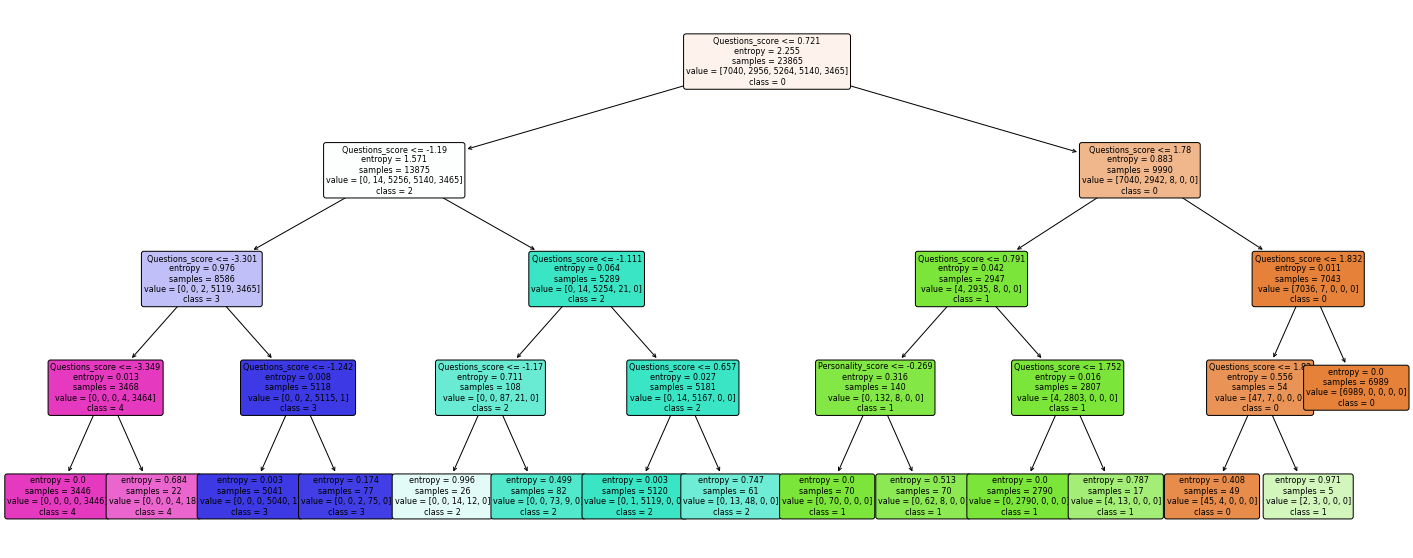

Confusion matrix :
[[4757    3    0    0    0]
 [   3 1949   13    0    0]
 [   0    1 3460    5    0]
 [   0    0   16 3414    5]
 [   0    0    0    0 2284]]
Accuracy : 0.9971087366436203
Presision : 0.9971184234964193
Sensitivity : 0.9971087366436203
Recall / Specificity : 0.9971087366436203
f1 score : 0.9971087134101849


decisionTree_gini


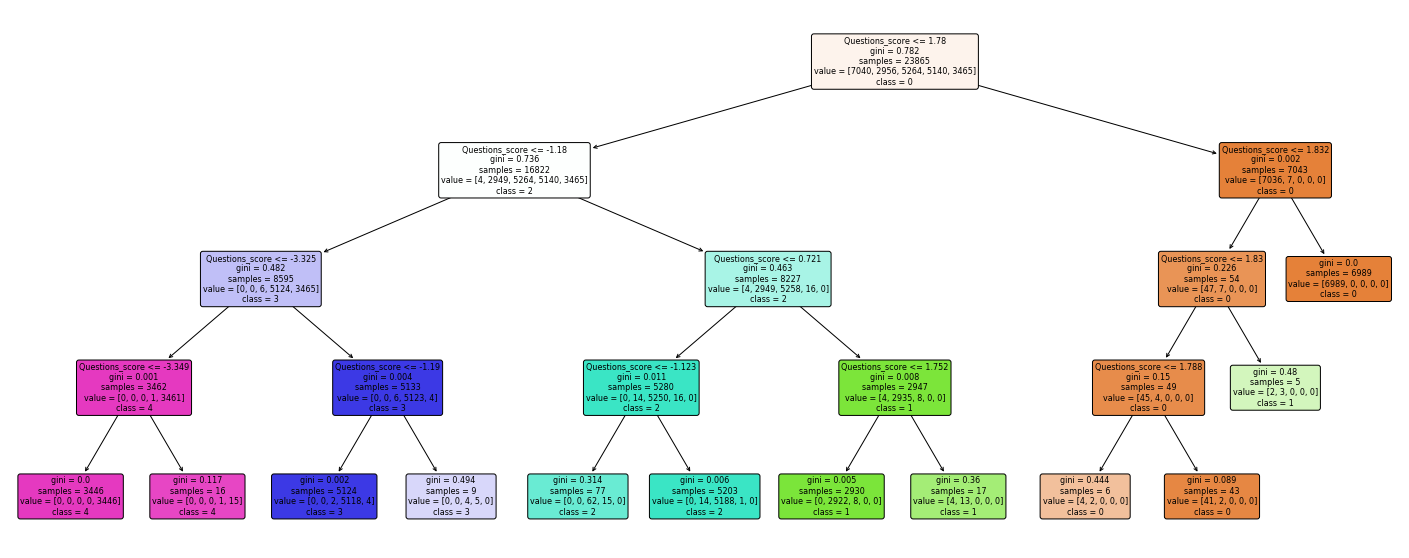

Confusion matrix :
[[4757    3    0    0    0]
 [   3 1949   13    0    0]
 [   0    1 3457    8    0]
 [   0    0   13 3420    2]
 [   0    0    0    0 2284]]
Accuracy : 0.9972972972972973
Presision : 0.9973028119577748
Sensitivity : 0.9972972972972973
Recall / Specificity : 0.9972972972972973
f1 score : 0.9972973533699844


naiveBayes
Confusion matrix :
[[4672   85    0    3    0]
 [ 151 1784   30    0    0]
 [  52   12 3338   64    0]
 [   0    0  346 2728  361]
 [   0    0    0   39 2245]]
Accuracy : 0.9281583909490886
Presision : 0.9311559073502148
Sensitivity : 0.9281583909490886
Recall / Specificity : 0.9281583909490886
f1 score : 0.9270021432294296


kNeighbours
Confusion matrix :
[[4645  114    1    0    0]
 [ 347 1352  265    1    0]
 [  41   63 3263   99    0]
 [   4    0  224 3175   32]
 [   4    0    2  329 1949]]
Accuracy : 0.9040854808296669
Presision : 0.9056373737322582
Sensitivity : 0.9040854808296669
Recall / Specificity : 0.9040854808296669
f1 score : 0.902022469178

In [24]:
Classification('stress', df1)

classification of anxiety

       Questions_score  Personality_score  education  urban  gender  age  \
0             4.591316          -1.525412          2      3       2   16   
1             0.358284          -1.983328          2      3       2   16   
2            -1.205996          -1.140805          2      3       2   17   
3             0.231983           3.913502          1      3       2   13   
4             6.355436          -2.512077          3      2       2   19   
...                ...                ...        ...    ...     ...  ...   
39770        -1.029855          -1.025010          2      2       1   16   
39771         4.640185          -2.208071          3      2       1   21   
39772        -4.067809           4.135684          3      2       2   48   
39773        -0.649257          -3.551723          3      2       2   20   
39774        -1.566387           0.328344          3      3       2   26   

       married  familysize  anxiety_state  
0            1  

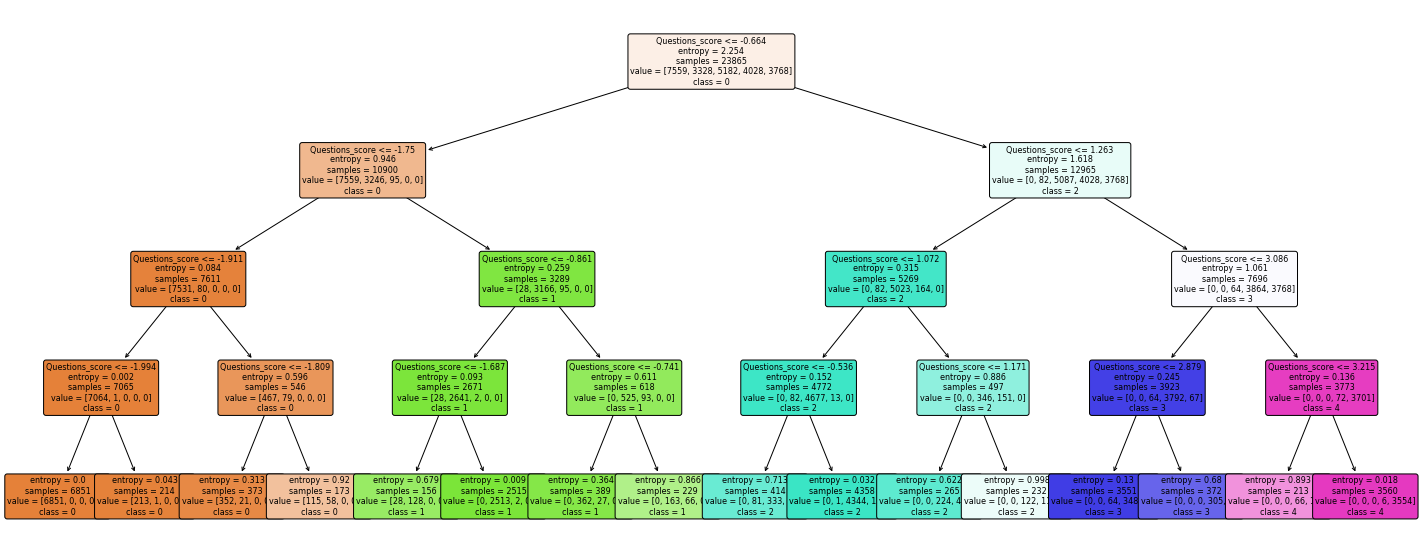

Confusion matrix :
[[4912   21    0    0    0]
 [  63 2257   42    0    0]
 [   0   64 3301   51    0]
 [   0    0  101 2548   45]
 [   0    0    0   37 2468]]
Accuracy : 0.9733500942803268
Presision : 0.9732982761536491
Sensitivity : 0.9733500942803268
Recall / Specificity : 0.9733500942803268
f1 score : 0.9732930767411799


decisionTree_gini


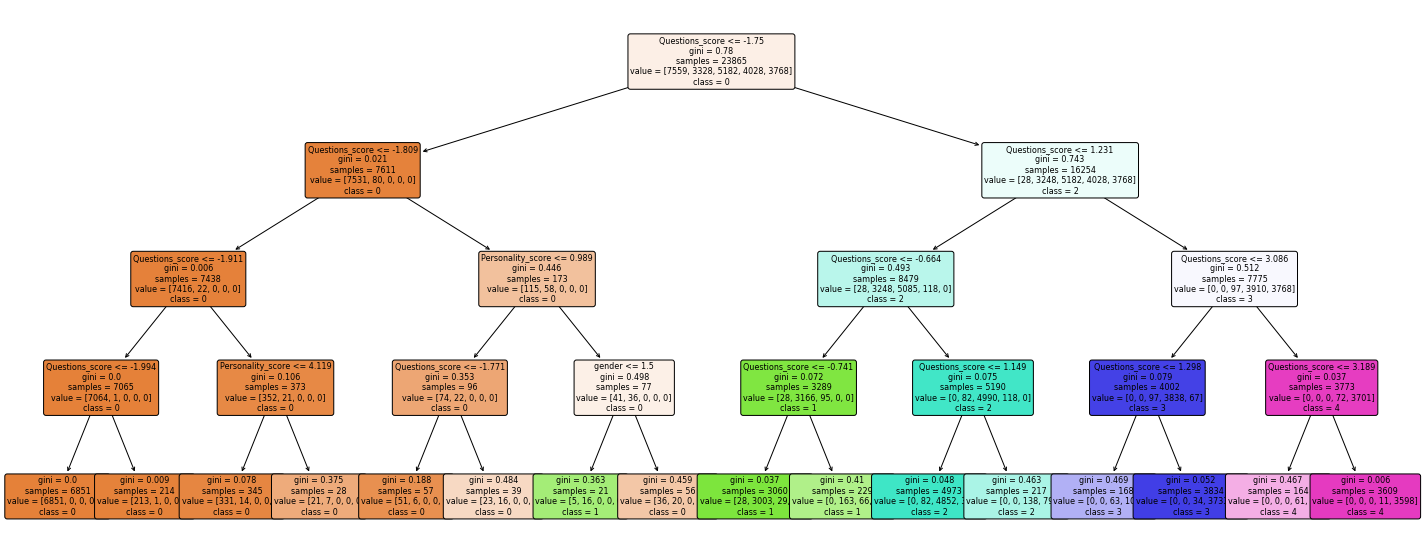

Confusion matrix :
[[4909   24    0    0    0]
 [  56 2264   42    0    0]
 [   0   64 3277   75    0]
 [   0    0   70 2579   45]
 [   0    0    0   37 2468]]
Accuracy : 0.9740414833438089
Presision : 0.9739857242388053
Sensitivity : 0.9740414833438089
Recall / Specificity : 0.9740414833438089
f1 score : 0.9740060480936888


naiveBayes
Confusion matrix :
[[4784  146    0    3    0]
 [ 171 2119   72    0    0]
 [  59   81 3224   52    0]
 [   0    0  348 1905  441]
 [   0    0    0   55 2450]]
Accuracy : 0.91024512884978
Presision : 0.9134041861810509
Sensitivity : 0.91024512884978
Recall / Specificity : 0.91024512884978
f1 score : 0.9079542990394124


kNeighbours
Confusion matrix :
[[4824  108    1    0    0]
 [ 507 1608  247    0    0]
 [  76  183 3079   78    0]
 [   2    0  300 2361   31]
 [   6    0   11  274 2214]]
Accuracy : 0.8853551225644248
Presision : 0.8862755005751793
Sensitivity : 0.8853551225644248
Recall / Specificity : 0.8853551225644248
f1 score : 0.8832192322074244


In [25]:
Classification('anxiety', df2)

classification of depression

       Questions_score  Personality_score  education  urban  gender  age  \
0            -1.291737          -1.525412          2      3       2   16   
1            -0.806301          -1.983328          2      3       2   16   
2            -4.824585          -1.140805          2      3       2   17   
3             1.345251           3.913502          1      3       2   13   
4            -2.947530          -2.512077          3      2       2   19   
...                ...                ...        ...    ...     ...  ...   
39770        -4.110932          -1.025010          2      2       1   16   
39771        -4.519418          -2.208071          3      2       1   21   
39772         4.591600           4.135684          3      2       2   48   
39773         1.469282          -3.551723          3      2       2   20   
39774        -1.630803           0.328344          3      3       2   26   

       married  familysize  depression_state  
0         

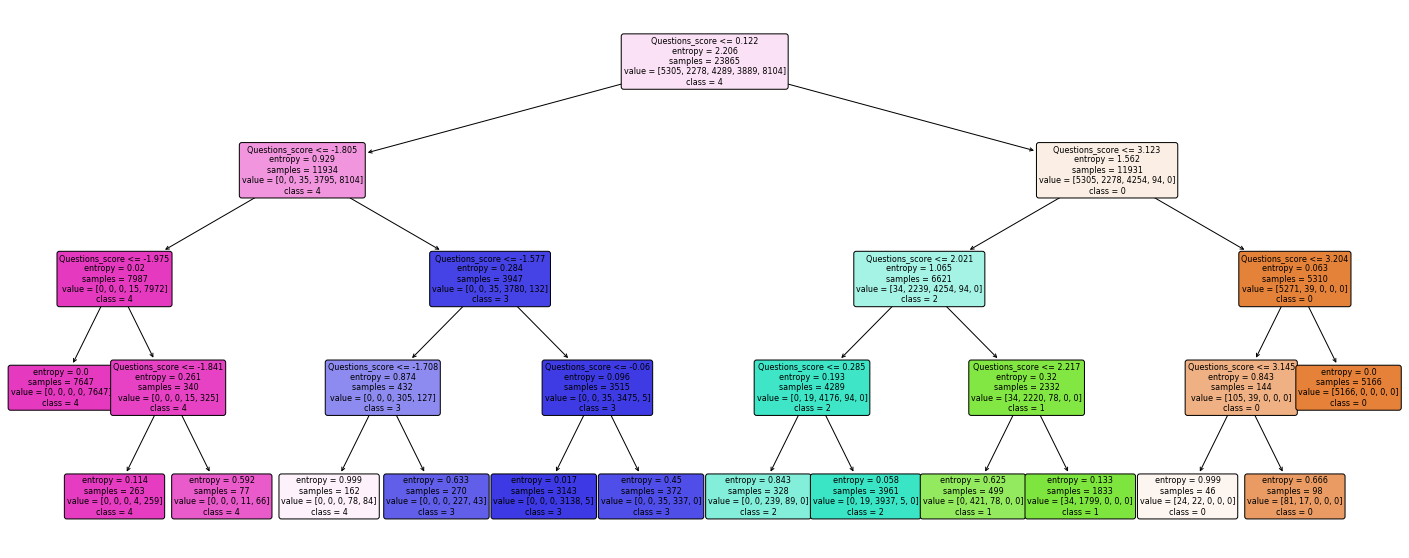

Confusion matrix :
[[3523   28    0    0    0]
 [  26 1455   27    0    0]
 [   0   57 2709   24    0]
 [   0    0   84 2428   76]
 [   0    0    0   40 5433]]
Accuracy : 0.9772470144563168
Presision : 0.9773075792022359
Sensitivity : 0.9772470144563168
Recall / Specificity : 0.9772470144563168
f1 score : 0.9772032537189438


decisionTree_gini


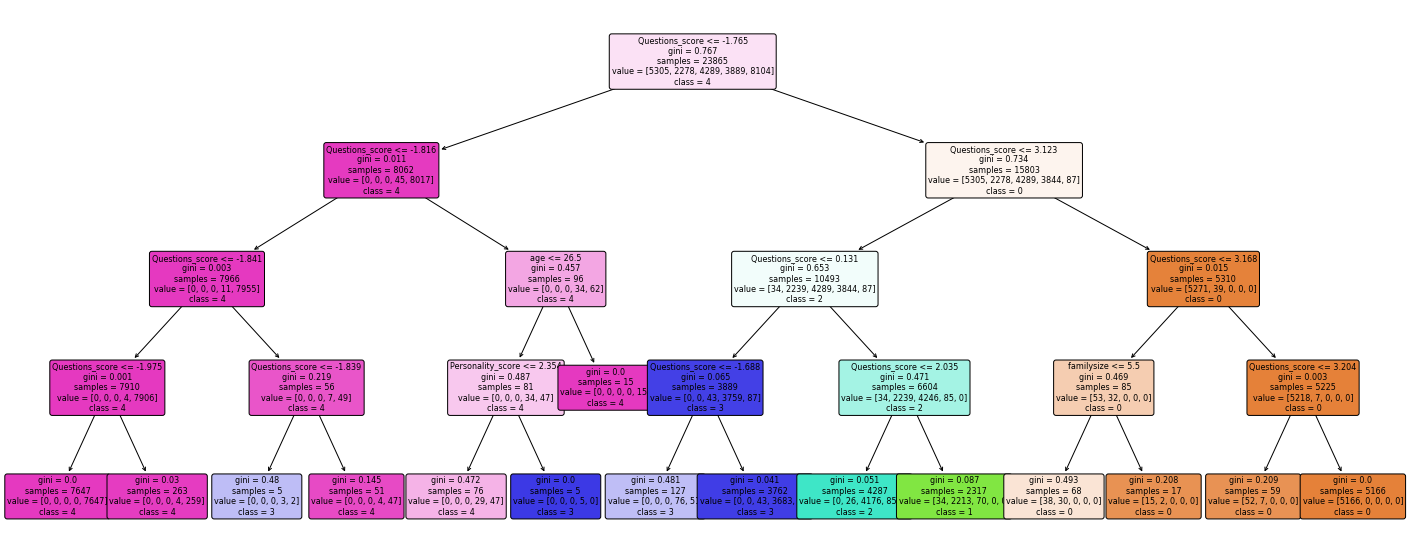

Confusion matrix :
[[3523   28    0    0    0]
 [  26 1448   34    0    0]
 [   0   52 2710   28    0]
 [   0    0   76 2475   37]
 [   0    0    0   75 5398]]
Accuracy : 0.9776241357636707
Presision : 0.9777212101191084
Sensitivity : 0.9776241357636707
Recall / Specificity : 0.9776241357636707
f1 score : 0.9776591705479364


naiveBayes
Confusion matrix :
[[3474   75    0    0    2]
 [  64 1378   66    0    0]
 [   4   63 2664   54    5]
 [   0    0   70 2443   75]
 [   0    0    0  281 5192]]
Accuracy : 0.952294154619736
Presision : 0.9536052346637103
Sensitivity : 0.952294154619736
Recall / Specificity : 0.952294154619736
f1 score : 0.95264827177822


kNeighbours
Confusion matrix :
[[3475   72    4    0    0]
 [ 302  902  304    0    0]
 [  33   68 2622   67    0]
 [   4    0  209 2255  120]
 [   3    0    1  148 5321]]
Accuracy : 0.9160905091137649
Presision : 0.9165923858037582
Sensitivity : 0.9160905091137649
Recall / Specificity : 0.9160905091137649
f1 score : 0.9131260166681863


In [26]:
Classification('depression', df3)

classification of mental_state

       Questions_score  Personality_score  education  urban  gender  age  \
0             5.992968          -1.525412          2      3       2   16   
1             1.579595          -1.983328          2      3       2   16   
2             1.867639          -1.140805          2      3       2   17   
3            -1.546160           3.913502          1      3       2   13   
4             6.308625          -2.512077          3      2       2   19   
...                ...                ...        ...    ...     ...  ...   
39770         1.219352          -1.025010          2      2       1   16   
39771         7.190489          -2.208071          3      2       1   21   
39772        -7.460039           4.135684          3      2       2   48   
39773         0.475980          -3.551723          3      2       2   20   
39774        -0.518009           0.328344          3      3       2   26   

       married  familysize  mental_state  
0           

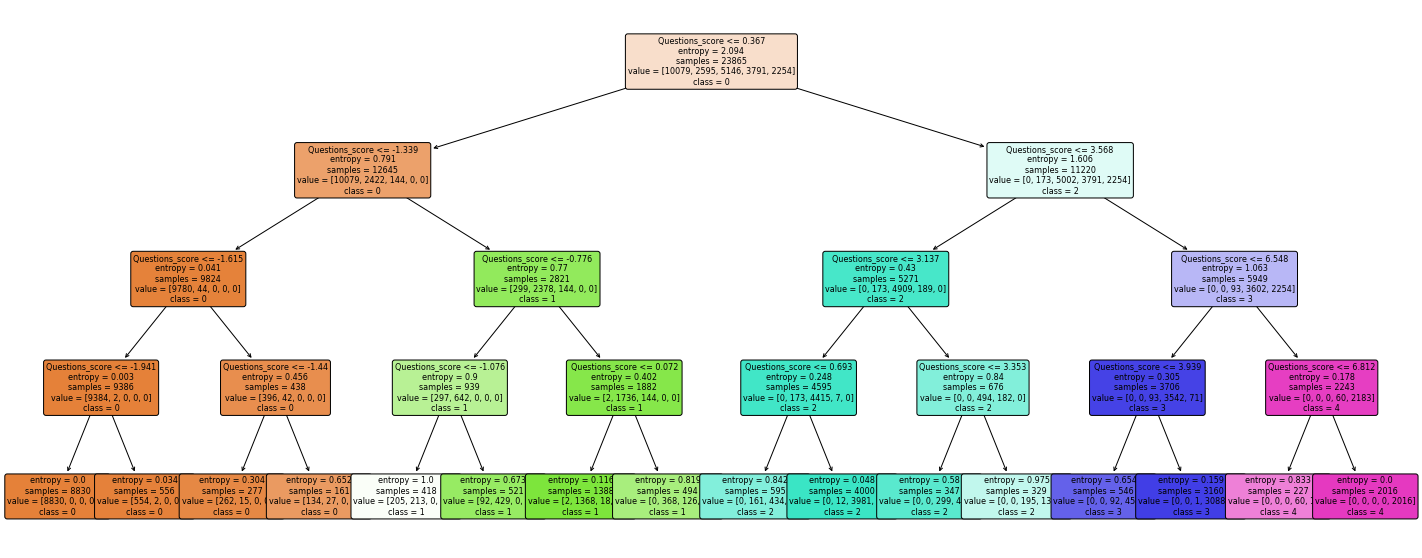

Confusion matrix :
[[6476  197    0    0    0]
 [  39 1636  112    0    0]
 [   0   90 3232   69    0]
 [   0    0  138 2346   52]
 [   0    0    0   45 1478]]
Accuracy : 0.953362664990572
Presision : 0.9547832302457087
Sensitivity : 0.953362664990572
Recall / Specificity : 0.953362664990572
f1 score : 0.9538102387960238


decisionTree_gini


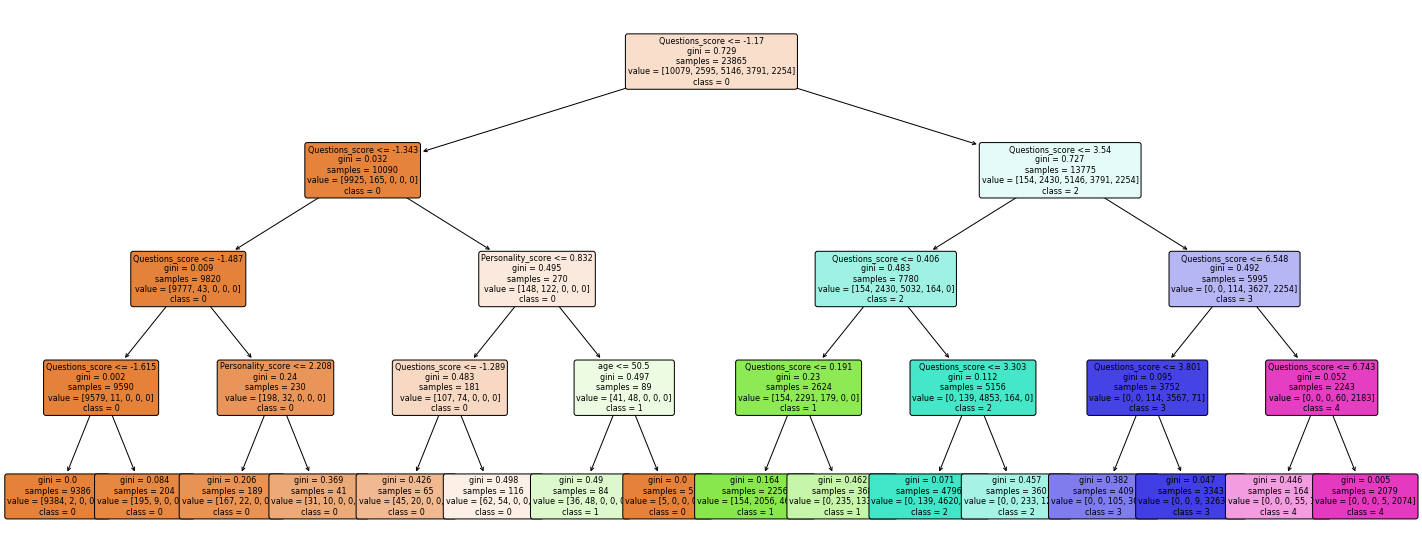

Confusion matrix :
[[6563  110    0    0    0]
 [  79 1618   90    0    0]
 [   0  125 3188   78    0]
 [   0    0  123 2361   52]
 [   0    0    0   45 1478]]
Accuracy : 0.9558768070395978
Presision : 0.9562722069065271
Sensitivity : 0.9558768070395978
Recall / Specificity : 0.9558768070395978
f1 score : 0.9560224161396519


naiveBayes
Confusion matrix :
[[6479  192    0    2    0]
 [ 189 1494  103    1    0]
 [  83  104 3150   54    0]
 [   1    0  380 1847  308]
 [   0    0    0   39 1484]]
Accuracy : 0.908485229415462
Presision : 0.9118038351572166
Sensitivity : 0.908485229415462
Recall / Specificity : 0.908485229415462
f1 score : 0.9069897380742135


kNeighbours
Confusion matrix :
[[6585   88    0    0    0]
 [ 258 1328  201    0    0]
 [  13  114 3196   68    0]
 [   2    0  229 2278   27]
 [   1    0    4  179 1339]]
Accuracy : 0.9255813953488372
Presision : 0.9254490831960837
Sensitivity : 0.9255813953488372
Recall / Specificity : 0.9255813953488372
f1 score : 0.924406320804171

In [27]:
Classification('mental_state', df)